In [72]:
import pandas as pd

df = pd.read_csv("Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv")

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Company Name                               450 non-null    object 
 1   company contact                            450 non-null    object 
 2   company email                              433 non-null    object 
 3   company phone                              450 non-null    object 
 4   Address                                    450 non-null    object 
 5   City                                       450 non-null    object 
 6   State                                      450 non-null    object 
 7   Postcode                                   450 non-null    int64  
 8   Industry                                   450 non-null    object 
 9   Industry descr                             434 non-null    object 
 10  Company Type              

In [74]:
# 1. How many different companies are represented in the data set?
len(df['Company Name'].unique())

439

In [75]:
# What is the total number of jobs created for businesses in Queens?
df[df['Borough'] == 'Queens']['Job created'].sum()

102.0

In [76]:
# How many different unique email domains names are 
# there in the data set?

len(df['company email'].dropna().str.split('@',expand=True)[1].unique())

357

In [82]:
# Considering only NTAs with at least 5 listed businesses, 
# what is the average total savings and the total jobs 
# created for each NTA?
nta_group = df.groupby('NTA').filter(lambda x: len(x) > 4)
df_avg = nta_group.groupby('NTA').mean(True)['Total Savings']

# Assume NaN in job created means 0 jobs were created
df_jobs = nta_group.groupby('NTA').sum(True)['Job created']
df_filtered = df_jobs.to_frame().join(df_avg).rename(columns={'Job created':'Total jobs created','Total Savings':'Average total savings'})
df_filtered.to_csv("Avg_savings_and_job_created_for_NTAs_with_more_than_5_business.csv")

# Day 5

In [78]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter
import datetime

plt.style.use('jayehat.mplstyle')

[Text(0, 0, '0'),
 Text(100000, 0, '100K'),
 Text(200000, 0, '200K'),
 Text(300000, 0, '300K'),
 Text(400000, 0, '400K'),
 Text(500000, 0, '500K')]

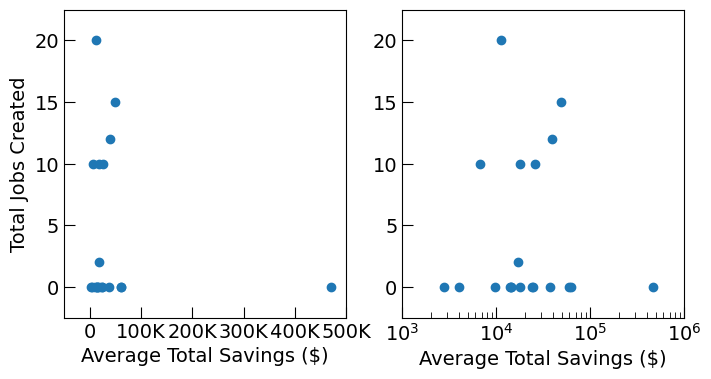

In [79]:
# Scatter plot of jobs created versus average savings. Use both
# a standard and a logarithmic scale for the average savings.

fig, axs = plt.subplots(1,2,figsize=(8,4))

axs[0].scatter(df_filtered['Average total savings'], df_filtered['Total jobs created'])
axs[1].scatter(df_filtered['Average total savings'], df_filtered['Total jobs created'])
axs[1].set_xscale('log')
axs[0].set_ylabel('Total Jobs Created')
axs[0].set_xlabel('Average Total Savings ($)')
axs[1].set_xlabel('Average Total Savings ($)')
axs[0].set_xlim(-50000,500000)
axs[0].set_ylim(-2.5,22.5)
axs[1].set_ylim(-2.5,22.5)

axs[0].set_yticks(list(range(0,25,5)),list(range(0,25,5)))
axs[1].set_yticks(list(range(0,25,5)),list(range(0,25,5)))
axs[0].yaxis.set_major_formatter(FormatStrFormatter('%d'))
axs[0].set_xticks([0,100000,200000,300000,400000,500000])
axs[0].set_xticklabels(['0','100K','200K','300K','400K','500K'])

(0.0, 6.5)

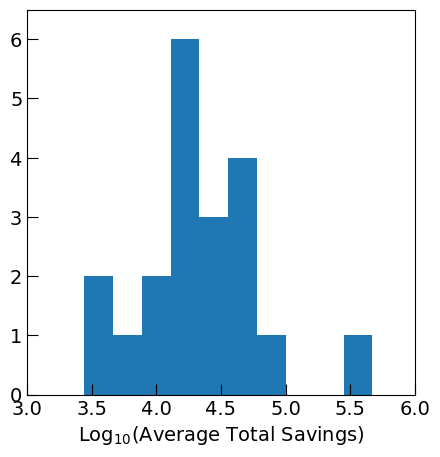

In [80]:
%matplotlib inline
# plt.rcParams.update({'font.size': 14,
#                      'axes.autolimit_mode':'round_numbers',
#                      'xtick.direction': 'in',
#                      'ytick.direction': 'in',
#                      'xtick.major.size': 8,
#                      'xtick.minor.size': 4,
#                      'ytick.major.size': 8,
#                      'ytick.minor.size': 4,

# })
fig, ax = plt.subplots()
ax.hist(np.log10(df_filtered['Average total savings']),10)
ax.set_xlabel('Log$_{10}$(Average Total Savings)')
ax.set_ylim(0,6.5)


/var/folders/fh/1wkn526x7pzdr03mqh7m7vnm0000gn/T/ipykernel_69238/314476181.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Month'] = pd.DatetimeIndex(df_filtered['Effective Date']).month


Text(0.5, 0, 'Month')

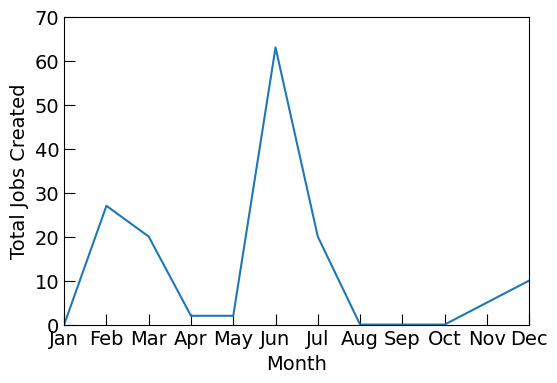

In [81]:
"""
Make a line plot of the total jobs created for each month.

There are a few assumptions made about this task. 
1. Line plot refers to a simple plot in matplotlib whose 
data points are connected by a line, not a line plot (or dot plot),
which is essentially a tally.
2. The month refers to be month in the 'Effective Date' 
category with no regard for the day or year.
"""
fig, ax = plt.subplots(figsize=(6,4))

# Create dataframe of only rows with values in 'Job created' and with a numeric month in 'Month'
df_filtered = df[df['Job created'].notnull()]
df_filtered['Month'] = pd.DatetimeIndex(df_filtered['Effective Date']).month

# Create dataframe with 1-12 months and summed over 'Job created' values for each month
df_plot = pd.DataFrame(index=list(range(1,13)))
df_plot = df_plot.join(df_filtered.groupby(['Month']).sum(True)['Job created'])
df_plot = df_plot.fillna(0)

ax.plot(df_plot.index,df_plot['Job created'])
ax.set_xlim([1,12])
ax.set_xticks(list(range(1,13)))
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax.set_ylabel('Total Jobs Created')
ax.set_xlabel('Month')